# Multiple linear regression model (Predict SPY)

**GOAL**: build a trading model of SPY, based on the historical data of different stock markets.

SPY tracks S&P500, the advantages of SPY are:
- Cheap: the value of SPY is ~1/10 of S&P500.
- Low fees
- High volatility

Response variable: Price change (Open Price Next Day - Open Price Today)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Data-Munging" data-toc-modified-id="Data-Munging-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Munging</a></span></li><li><span><a href="#Data-Spliting---Train-and-Test-samples" data-toc-modified-id="Data-Spliting---Train-and-Test-samples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Spliting - Train and Test samples</a></span></li><li><span><a href="#Explore-the-train-data-set" data-toc-modified-id="Explore-the-train-data-set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore the train data set</a></span></li><li><span><a href="#Correlation-between-SPY-and-indices" data-toc-modified-id="Correlation-between-SPY-and-indices-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation between SPY and indices</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Model-evaluation---Statistical-standard" data-toc-modified-id="Model-evaluation---Statistical-standard-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model evaluation - Statistical standard</a></span></li><li><span><a href="#Evaluating-strategy-built-from-Regression-model" data-toc-modified-id="Evaluating-strategy-built-from-Regression-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Evaluating strategy built from Regression model</a></span><ul class="toc-item"><li><span><a href="#Profit-of-Signal-based-strategy" data-toc-modified-id="Profit-of-Signal-based-strategy-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Profit of Signal-based strategy</a></span></li><li><span><a href="#Evaluation-using-Risk-measures---Sharpe-&amp;-Maximum-Drawdown" data-toc-modified-id="Evaluation-using-Risk-measures---Sharpe-&amp;-Maximum-Drawdown-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Evaluation using Risk measures - Sharpe &amp; Maximum Drawdown</a></span></li></ul></li></ul></div>

## Data description

Different markets - different time zones.
- Eastern Time (ET) for US: 9:00AM - 4:00PM.
- Eastern Time (ET) for EU: 3:00AM - 11:30AM.
- Eastern Time (ET) for Asia: 8:00PM(yesterday) - 3:00AM

When US market opens - Asian market information(Open & Close) is available. Updated data for European market (besides Close) is also available.

**Asian markets including Australia**
- **aord** - The All Ordinaries (XAO) or "All Ords" is considered a total market barometer for the Australian stock market and contains the 500 largest ASX listed companies by way of market capitalisation.
- **nikkei** - The Nikkei 225, more commonly called the Nikkei is a stock market index for the Tokyo Stock Exchange (TSE).
- **hsi** - Hong Kong, Hang Seng Index (HSI)

**Europe**
- **daxi** - The DAX is a blue chip stock market index consisting of the 30 major German companies trading on the Frankfurt Stock Exchange. 
- **cac40** - The CAC 40 (Cotation Assistée en Continu) is a benchmark French stock market index.

**US**
- **sp500** - The S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States.
- **dji** - The Dow Jones Industrial Average is a stock market index that tracks the stock prices of the top 30 U.S. companies. Analysts use it to gauge the health of the stock market. It reflects investors' confidence in those companies and in the economy overall.
- **nasdaq** - The Nasdaq Composite Index is the market capitalization-weighted index of over 3,300 common equities listed on the Nasdaq stock exchange.
- **spy** - The SPDR S&P 500 trust is an exchange-traded fund. It is designed to track the S&P 500 stock market index. This fund is the largest ETF in the world.

In [1]:
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import all stock market data into DataFrame
aord = pd.read_csv('data/signal_based_trading_strategy/ALLOrdinary.csv', index_col = 0)
nikkei = pd.read_csv('data/signal_based_trading_strategy/Nikkei225.csv', index_col = 0)
hsi = pd.read_csv('data/signal_based_trading_strategy/HSI.csv', index_col = 0)
daxi = pd.read_csv('data/signal_based_trading_strategy/DAXI.csv', index_col = 0)
cac40 = pd.read_csv('data/signal_based_trading_strategy/CAC40.csv', index_col = 0)
sp500 = pd.read_csv('data/signal_based_trading_strategy/SP500.csv', index_col = 0)
dji = pd.read_csv('data/signal_based_trading_strategy/DJI.csv', index_col = 0)
nasdaq = pd.read_csv('data/signal_based_trading_strategy/nasdaq_composite.csv', index_col = 0)
spy = pd.read_csv('data/signal_based_trading_strategy/SPY.csv', index_col = 0)

In [4]:
hsi.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,27632.199219,27853.599609,27299.449219,27560.519531,27560.519531,1.232143e+09
2008-01-03,27050.029297,27223.710938,26864.130859,26887.279297,26887.279297,2.442744e+09
2008-01-04,27004.339844,27596.859375,26994.849609,27519.689453,27519.689453,2.375522e+09
2008-01-07,26962.539063,27186.070313,26698.539063,27179.490234,27179.490234,2.452932e+09
2008-01-08,27466.960938,27637.599609,27088.699219,27112.900391,27112.900391,2.492361e+09


## Data Munging
Due to the timezone issues, we extract and calculate appropriate stock market data for analysis

In [5]:
# Indicepanel is the DataFrame of our trading model
# Start with an empty dataframe with an index (Date) matching spy
indicepanel=pd.DataFrame(index=spy.index)

In [6]:
# Resposen variable:
indicepanel['spy']=spy['Open'].shift(-1)-spy['Open'] # spy.Open(t+1) - spy.Open(t)

In [7]:
# Predictors:

# The difference between spy.Open(t+1) - spy.Open(t) is only observed at (t+1) thus we shift our calculations `down` by 1 row.
indicepanel['spy_lag1']=indicepanel['spy'].shift(1) # Shift result to (t+1)

# Open Today - Open Last Day
indicepanel['sp500']=sp500["Open"]-sp500['Open'].shift(1) # Open(t) - Open(t-1)
indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['dji']=dji['Open']-dji['Open'].shift(1)

# Todays and yesterday Open price is available.
# Ideally for EU markets we would want to use Open price during noon (intraday) 
# as it is available at the time when US market opens.
indicepanel['cac40']=cac40['Open']-cac40['Open'].shift(1)
indicepanel['daxi']=daxi['Open']-daxi['Open'].shift(1)

# Asian
# Close and Open prices are available for Asian markets.
indicepanel['aord']=aord['Close']-aord['Open']
indicepanel['hsi']=hsi['Close']-hsi['Open']
indicepanel['nikkei']=nikkei['Close']-nikkei['Open']

# Last column - Open price of SPY which will be used in trading.
indicepanel['Price']=spy['Open']

In [8]:
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-02,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,-50.100097,-71.679688,NaN,146.529999
2008-01-03,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-2.300293,-162.750000,NaN,144.910004
2008-01-04,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,NaN,515.349609,-464.320313,143.339996
2008-01-07,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2008-01-08,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002


In [9]:
# Lets check whether do we have NaN values in indicepanel
# Different market has different holiday periods in which the markets are closed.
# This generates NaN values.
indicepanel.isnull().sum()

spy           1
spy_lag1      1
sp500         1
nasdaq        1
dji           1
cac40        30
daxi         53
aord        319
hsi         121
nikkei      145
Price         0
dtype: int64

In [10]:
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [11]:
# Lets check whether do we have Nan values in indicepanel now
indicepanel.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [12]:
# save merged dataframe
path_save = 'data/signal_based_trading_strategy/indicepanel.csv'
indicepanel.to_csv(path_save)

In [13]:
print(indicepanel.shape)
# We have 2677 days of data, 1 Response variable, 9 Predictors and 
# last collumn keeps a record of Open price of SPY which will be used in Paper Trading.

(2677, 11)


## Data Spliting - Train and Test samples

To make sure that our model is consistent in future data, we need to split data into two parts:
- one is for building the model (TRAIN)
- the other part is for testing the model to see if the model can still make reasonable prediction in this dataset. (TEST)

In [14]:
#split the data into (1)train set and (2)test set
 
Train = indicepanel.iloc[-2000:-1000, :] # 1,000 days before TEST
Test = indicepanel.iloc[-1000:, :] # The most recent 1,000 days.
print(Train.shape, Test.shape)

(1000, 11) (1000, 11)


## Explore the train data set

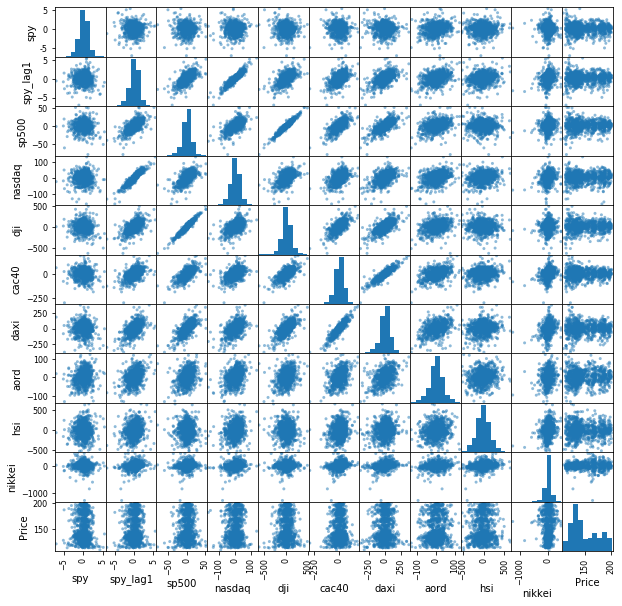

In [15]:
# Generate scatter matrix among all stock markets (and the price of SPY) to observe the association

from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(10, 10))

## Correlation between SPY and indices

In [16]:
# Find the indice with largest correlation
corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)

spy         1.000000
spy_lag1   -0.011623
sp500      -0.018632
nasdaq      0.012333
dji        -0.037097
cac40      -0.055304
daxi       -0.069735
aord        0.179638
hsi         0.031400
nikkei     -0.035048
Name: spy, dtype: float64


**Build OLS Regression model**

- Prob(F-statistic): Significance of the overall model. Testing against H0, which states that all $\beta$ values are equal to 0. Alternative hypothesis states that at least one of them is not zero. Low Prob(F-statistic) indicates that model includes useful predictors.
- P>|t| - probability values for each predictor. We see that most of the predictors are not significant except AORD. **This can be caused by Multicollinarity**, where two or more predicotrs are highly, linearly related.

In [17]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     7.962
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           1.97e-11
Time:                        13:47:31   Log-Likelihood:                -1617.7
No. Observations:                1000   AIC:                             3255.
Df Residuals:                     990   BIC:                             3305.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0836      0.039      2.138      0.033       0.007       0.160
spy_lag1      -0.1567      0.091     -1.730      0.084      -0.335       0.021
sp500          0.0221      0.014      1.621      0.105      -0.005       0.049
nasdaq         0.0040      0.004      1.066      0.287      -0.003       0.011
dji           -0.0018      0.001     -1.248      0.212      -0.005       0.001
cac40         -0.0003      0.002     -0.153      0.879      -0.004       0.004
aord           0.0093      0.001      7.492      0.000       0.007       0.012
daxi          -0.0025      0.001     -2.387      0.017      -0.005      -0.000
nikkei        -0.0004      0.000     -1.264      0.207      -0.001       0.000
hsi            0.0003      0.000      1.222      0.222      -0.000       0.001
==============================================================================
Omnibus:                       91.018   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.687
Skew:                          -0.450   Prob(JB):                     7.45e-59
Kurtosis:                       5.369   Cond. No.                         405.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prediction

In [18]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

In [19]:
Train.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price,PredictedY
Date,,,,,,,,,,,,
2010-09-13,-0.080002,1.459999,8.810059,24.719971,43.58984,62.219970,72.289551,40.900390,261.449218,-3.819335,112.580002,0.333314
2010-09-14,-0.180000,-0.080002,7.780029,17.510010,86.13086,2.139893,3.270019,7.700196,-64.691406,-20.190430,112.500000,0.234375
2010-09-15,0.410003,-0.180000,-1.729980,1.859863,-18.31055,8.810058,20.740235,32.600097,-94.308594,-20.190430,112.320000,0.342496
2010-09-16,0.309998,0.410003,4.459961,14.340088,45.33008,-18.280029,-27.379883,-53.000000,-2.761719,-104.389648,112.730003,-0.281120
2010-09-17,-0.160004,0.309998,2.500000,20.909912,23.79981,20.330078,42.790039,27.399903,226.330078,44.439453,113.040001,0.323248


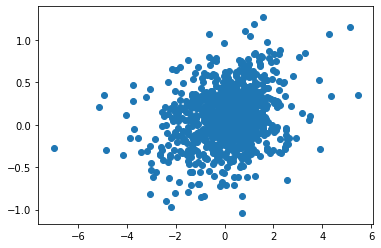

In [20]:
# Scatter plot between real daily change and predicted
# We see a positive correlation, although not very strong one.
plt.scatter(Train['spy'], Train['PredictedY'])

## Model evaluation - Statistical standard
We can measure the performance of our model using some statistical metrics - RMSE, Adjusted $R^2$



In [21]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [22]:
# Function to generate output: compare r-squared and RMSE for Train and Test data.
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [23]:
# Get the assement table fo our model
assessTable(Test, Train, lm, 9, 'spy')

,Train,Test
R2,0.059020,0.067248
RMSE,1.226068,1.701291


Check whether R-squared and RMSE are different dramatically between TRAIN and TEST. If so, it is called **overfitting**. Usually, for overfitting model, RMSE and adjusted R-squared is much better in train than in test dataset. This would imply that we cannot apply this model to real market in future. 

If we look at our output - we see that RMSE slighly increases in TEST, but overall - model does not seem to be overfitted. Adjusted R-squared is on the low side (~6%), but this is normal when dealing with a stock data.

In [24]:
del(Train, Test, aord, cac40, corr_array, daxi, dji, formula, hsi, indicepanel, lm, nasdaq, nikkei, path_save, sm, sp500, spy)

## Evaluating strategy built from Regression model

In [25]:
# Read the combined dataset
indicepanel = pd.read_csv('data/signal_based_trading_strategy/indicepanel.csv', index_col = 0)
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-04,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,-2.300293,515.349609,-464.320313,143.339996
2008-01-07,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2008-01-08,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002
2008-01-09,0.589997,-2.990006,-25.459961,-63.119873,-230.69043,-17.109864,-5.270020,-12.900390,768.359375,234.450195,139.089996
2008-01-10,1.100006,0.589997,16.530029,8.270019,142.90039,9.140137,-40.120117,-100.200196,-195.560547,-158.209961,139.679993


In [26]:
# Split data into Train and Test parts
Train = indicepanel.iloc[-2000:-1000, :]
Test = indicepanel.iloc[-1000:, :]

In [27]:
# Multiple regression model
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()

In [28]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

### Profit of Signal-based strategy

Given the predicted values of SPY return (`PredictedY`), we create a signal where `1` corresponds to `LONG` and `-1` to `SHORT`. 

In [29]:
# Train
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  214.34009500000042


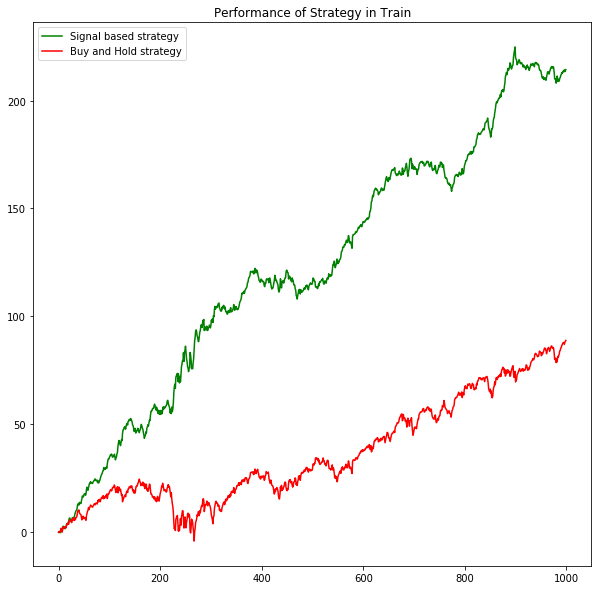

In [30]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

We can see that signal based strategy outperforms a passive Buy and Hold strategy.

In [31]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  241.0300879999996


The consistency of performance is very important. Otherwise, it is too risky to apply it in the future.

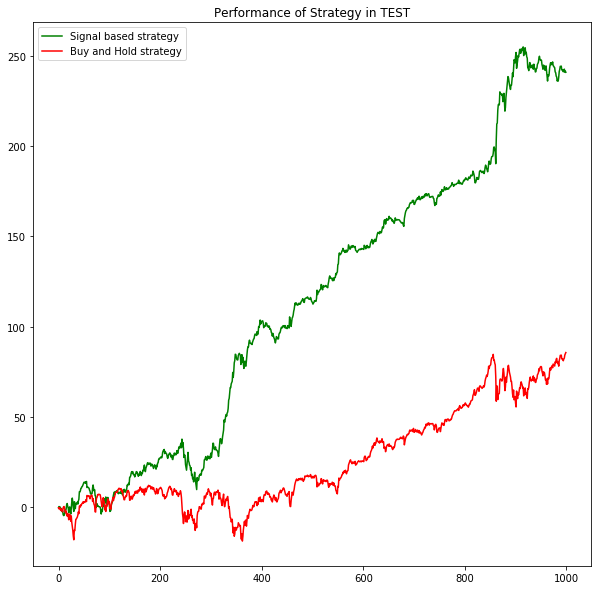

In [32]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in TEST')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

### Evaluation using Risk measures - Sharpe & Maximum Drawdown

We introduce two common practical standards - **Sharpe Ratio**, **Maximum Drawdown** to evaluate our model performance.

Sharpe - measures excess return per unit of risk (risk is measured using standard deviation of excess return).

Maximum drawdown - the maximum percentage decline in the strategy from the historical peak profit at each point in time. 



In [33]:
Train.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price,PredictedY,Order,Profit,Wealth
Date,,,,,,,,,,,,,,,
2010-09-13,-0.080002,1.459999,8.810059,24.719971,43.58984,62.219970,72.289551,40.900390,261.449218,-3.819335,112.580002,0.333314,1,-0.080002,-0.080002
2010-09-14,-0.180000,-0.080002,7.780029,17.510010,86.13086,2.139893,3.270019,7.700196,-64.691406,-20.190430,112.500000,0.234375,1,-0.180000,-0.260002
2010-09-15,0.410003,-0.180000,-1.729980,1.859863,-18.31055,8.810058,20.740235,32.600097,-94.308594,-20.190430,112.320000,0.342496,1,0.410003,0.150001
2010-09-16,0.309998,0.410003,4.459961,14.340088,45.33008,-18.280029,-27.379883,-53.000000,-2.761719,-104.389648,112.730003,-0.281120,-1,-0.309998,-0.159997
2010-09-17,-0.160004,0.309998,2.500000,20.909912,23.79981,20.330078,42.790039,27.399903,226.330078,44.439453,113.040001,0.323248,1,-0.160004,-0.320001


In [34]:
# Include initial invesment (1 share of SPY)
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

In [35]:
# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.17965076303258082
Yearly Sharpe Ratio is  2.851867450963229


In [36]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.13035126208575046
Yearly Sharpe Ratio is  2.06926213537379


In [37]:
# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

Maximum Drawdown in Train is  0.06069016443644382


In [38]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.11719899524631659
